**Enunciado**


El ejercicio de evaluación final va a tratar sobre clasificación de imagen. Para esta ocasión, se van a crear múltiples clasificadores sobre imágenes que representen escenas o paisajes. Los datos que se van a emplear fueron publicados por Intel para competiciones de clasificación de imagen. La fuente original de los datos puede encontrarse aquí: https://www.kaggle.com/datasets/puneet6060/intel-image-classification



Los modelos realizarán clasificación multiclase, ya que cada imagen puede contener seis etiquetas diferentes que son las que siguen:



0 Buildings.
1 Forest.
2 Glacier.
3 Mountain.
4 Sea.
5 Street.


La estructura de archivos que se pueden encontrar en los datos de la práctica final es la siguiente:



-Archive
Seg_pred
Seg_pred (7301 archivos)
3.jpg
5.jpg
…
24333.jpg
Seg_test
Seg_test
Buildings (437 archivos)
20057.jpg
…
Forest (474 archivos)
Glacier (553 archivos)
Mountain (525 archivos)
Sea (510 archivos)
Street (501 archivos)
Seg_train
Seg_train
Buildings (2191 archivos)
Forest (2271 archivos)
Glacier (2404 archivos)
Mountain (2512 archivos)
Sea (2274 archivos)
Street (2382 archivos)


Los datos totales sobre las imágenes pertenecen a 14 000 imágenes para train, 3000 para test y 7000 en predicción (aunque, al no estar provista de etiqueta, no se va a hacer uso de esta última); por lo tanto, el conjunto de datos es de 24 000 imágenes.



Respecto a cada imagen, todas tienen una estructura de 150 x 150 píxeles. La idea con los múltiples clasificadores es poner en práctica lo que se ha aprendido durante el módulo, es decir, aplicar redes convolucionales, realizar transfer learning, saber optimizar y seleccionar los parámetros de una red y, adicionalmente, superar un nuevo reto que no se ha trabajado de forma automática en el módulo: aumentar los datos.



Durante el módulo, se ha trabajado con OpenCV, por lo que el alumnado debería saber manejar los tres channels de una imagen; pues se ha explicado cómo aplicar filtros para cambiar el color, recortar, redimensionar, rotar y, en definitiva, modificar una imagen. Si a cada imagen se le hacen varias modificaciones y se agrega tanto la original como las modificadas al dataset, se estaría realizando un aumento de datos, no obstante. Hay funciones que hacen esto de forma automática, por lo que, habrá que aprender en la práctica final a utilizar una nueva función de Keras, ImageDataGenerator (https://www.tensorflow.org/api_docs/python/tf/keras/preprocessing/image/ImageDataGenerator). Puesto que es muy habitual en proyectos reales, tener que adaptarse y comprender nuevas funciones de estos frameworks de deep learning, la idea es que el alumnado simule una situación de proyectos reales).



**Se pide**



Por lo tanto, el objetivo final del caso práctico es establecer una comparativa de modelos para ver cuál ofrece mayor rendimiento (accuracy) en test y en validación; la elección de cuántos modelos implementar y sus configuraciones es libre, pero como mínimo han de implementarse los siguientes cinco modelos sobre los que establecer la comparativa:



Modelo base basado en redes neuronales convolucionales: la arquitectura CNN de este modelo es libre, pero al menos debe tener una capa convolucional y una capa pooling (de libre elección el tipo de pooling) antes de la capa densa de salida. En el siguiente apartado se implementará de forma más compleja.
Modelo aumentado sobre el modelo base: es decir, que añade más capas a la arquitectura convolucional anterior.
Modelo basado en hyperparameter tuning a través de keras_tuner: en este modelo se pueden trabajar parámetros de regularización (L1 y L2), inicialización de pesos, funciones de activación, añadir sí o no dropout, etc. La elección de los hiperparámetros es libre, pero se aplicará al segundo modelo, es decir, al que se ha añadido más capas sobre el modelo base.
Modelo basado en transfer learning: el modelo preentrenado sobre el que cargar los pesos de la red es libre, siempre y cuando se elija cualquiera deKeras (https://keras.io/api/applications/). Se puede escoger realizar tanto featureextraction como fine-tuning, aunque se valorará más positivamente (dadala complejidad de congelar capas de entrenamiento) realizar fine-tuning.
Modelo basado en aumento de datos sobre cualquiera de los cuatro modelos implementados anteriormente (se aconseja sobre el modelo que mayor score haya devuelto la función evaluate). Para el aumento de datos, debe emplearse lafunción ImageDataGenerator, la elección de parámetros en ImageDataGeneratores libre.
Cualquier otro modelo que el alumno desee implementar y añadir a la comparativa(opcional).


Se aconseja, para todos los modelos, mostrar predicciones (desde imshow).



Para todos los modelos, se tomará un 20 % de la muestra como conjunto de validación (se puede generar un nuevo conjunto de validación o tomar el parámetro validation_split = 0,20).



De forma obligatoria todas las imágenes de seg_test y seg_train (no se cargará seg_pred) formarán el conjunto completo de datos, una vez que se tengan estos, se tomará un 75 % para train y un 25 % para test.



Igualmente, los modelos del uno al cinco han de implementarse desde Keras; si el alumnado desea realizar más modelos opcionales puede utilizar, además de esta, otras librerías de deep learning para Python, como TensorFlow en su abstracción a bajo nivel, Theano, PyTorch o similares.



Al finalizar el ejercicio se mostrará una gráfica comparativa como la siguiente sobre el validation accuracy, obtenido por los modelos:


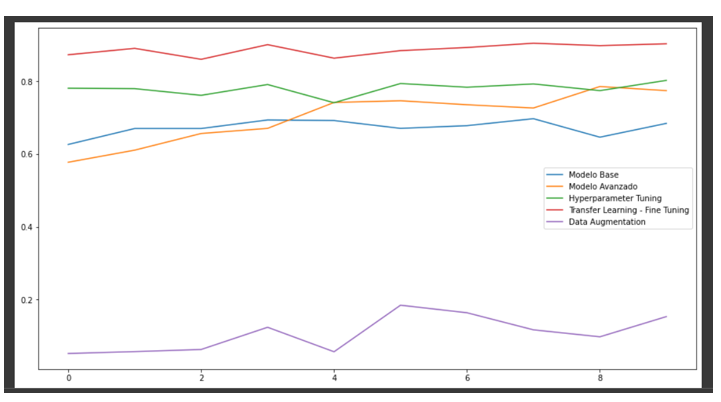


Y una tabla comparativa como la siguiente con el resultado de la función evaluate en test de todos los modelos:



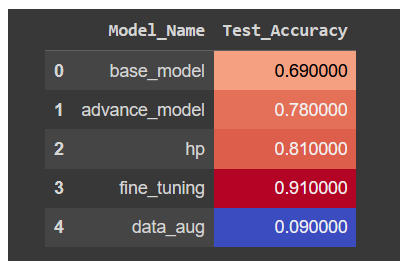


Nota:



Los parámetros de configuración de la red como número de filtros en capas convolucionales, tamaño del kernel, desplazamiento del kernel o stride son libres, así como los parámetros de las capas de pooling y valores de padding. Por supuesto, también es libre la elección del número de neuronas de las capas densas al aplanar resultados, antes de la capa de salida final, y el optimizador también es de elección libre. No obstante, dada la naturaleza del ejercicio, para la función de coste (loss), dependiendo del preprocesamiento de datos, se tomará o bien categorical_crossentropy o sparse cateoricalcross entropy.
Los parámetros de batch size onúmero de etapas (epochs) también son libres, ya que dependen en gran medida de la disponibilidad de recursos como GPU o RAM.


Consejos importantes para la práctica



Es una práctica exigente en RAM; para no realizar excesivas epochs se puede hacer uso de callbacks deKeras como la parada temprana (early stopping).
Si no se dispone de mucha RAM o se quiere tener acceso a GPU gratuita (con ciertas restricciones), se puede hacer uso de Google Colab.
Si no es posible realizar toda la práctica en un solo notebook, debido a problemas de recursos, se puede hacer lo siguiente:


En un notebook cargar las imágenes, obtener los tensores preprocesados, cualquier array de NumPy puede guardarse con la función np.save(con extensión “.npy”); posteriormente, generar un notebook por modelo de red neuronal, en cada modelo hacer uso de la función np.load y asíevitar tener que cargar las imágenes, pues se estarían cargando directamente lostensores.
Implementar un modelo por cada notebook (en cada cual se realizará np.load para cargar los tensores). Después de entrenar el modelo, se pondrá la atención en dos elementos para después poder generar la gráfica comparativa.


El history del modelo, es un JSON que puede exportarse con JSON dumps o con la función write.
El modelo completo puede exportarse como “.h5” con la función save (https://www.tensorflow.org/guide/keras/save_and_serialize?hl=es-419). Después de guardar el modelo, enotro notebook se puede cargar y realizar posteriormente la función evaluate en test (también se pueden exportar los modelos como JSON; es posible ver ejemplos de ello en el enlace anterior).
De esta forma, cuando se implemente un modelo, se guardará, se apagará el notebook y se liberará RAM. Posteriormente, se deberá cargar un modelo, que es menos costoso en recursos que entrenarlo de forma completa.
Si se siguen teniendo problemas de RAM, ya que los tensores son considerables en memoria y el alumnado no tiene recursos para cargar las 17 000 imágenes de entrenamiento, se pueden cargar únicamente 3000, por ejemplo, 500 imágenes de cada label de seg_train(se recomienda probar Google Colab antes de realizar este paso, y los modelos se pueden guardar en Drive).


Entregable



Una carpeta comprimida (".rar” o “.zip”), en la cual estén los notebooks tanto en formato “.ipynb” como en “.html” al guardar el notebook.



Nota: no es necesario entregar modelos guardados en “.h5” ni arrays en NPY ni los archivos de origen con las imágenes; únicamente se entregan los notebooks.





Anexo



Ejemplo de uso de ImageDataGenerator.



datagen = ImageDataGenerator(

       rotation_range=40,

       width_shift_range=0.2,

       height_shift_range=0.2,

       validation_split  = 0.2

       rescale=1./255,

       shear_range=0.2,

       zoom_range=0.2,

       horizontal_flip=True,

       fill_mode='nearest')



datagen.fit(X_train)



train_generator = datagen.flow(X_train, y_train, batch_size=32, subset='training')



validation_generator = datagen.flow(X_train, y_train, batch_size=32, subset='validation')



data_aug = model.fit(train_generator,

                    epochs=EPOCHS,

                    validation_data=validation_generator,

                    batch_size=BATCH_SIZE)

Para comenzar vamos a empezar con la carga del dataset siguiendo la metodología de las prácticas anteriores. En nuestro caso lo más eficiente será utilizar image_dataset_from_directory de tf.keras.preprocessing para cargar directamente las imágenes desde las carpetas

Importamos librerias

In [ ]:
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np

from tensorflow.keras import datasets
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, Flatten, MaxPooling2D
from tensorflow.keras.losses import SparseCategoricalCrossentropy

In [ ]:
from google.colab import files

# Subir archivo
uploaded = files.upload()

Saving kaggle.json to kaggle.json


1.   Movemos kaggle.json al directorio correcto y establecemos permisos





In [ ]:
import os

# Crear la carpeta de Kaggle si no existe
!mkdir -p ~/.kaggle

# Mover kaggle.json a la carpeta de Kaggle
!cp /content/kaggle.json ~/.kaggle/

# Dar permisos correctos para evitar errores de acceso
!chmod 600 ~/.kaggle/kaggle.json

2.   Descargar y extraer el dataset de Kaggle


In [ ]:
from kaggle.api.kaggle_api_extended import KaggleApi

# Inicializar API de Kaggle
api = KaggleApi()
api.authenticate()

# Definir la carpeta donde se guardará el dataset
dataset_name = "puneet6060/intel-image-classification"
download_path = "/content/"

# Descargar y extraer los archivos
api.dataset_download_files(dataset_name, path=download_path, unzip=True)

# Listar el contenido para verificar la descarga
os.listdir("/content/")

Dataset URL: https://www.kaggle.com/datasets/puneet6060/intel-image-classification


['.config', 'seg_pred', 'kaggle.json', 'seg_train', 'seg_test', 'sample_data']

3.  Cargamos las imágenes con image_dataset_from_directory

In [ ]:
# Definir la ruta correcta donde están las carpetas de cada clase
data_dir = "/content/seg_train/seg_train/"

# Parámetros de carga
batch_size = 32
img_size = (150, 150)

# Cargar el conjunto de entrenamiento y validación desde las carpetas de clases
train_dataset = tf.keras.preprocessing.image_dataset_from_directory(
    data_dir,
    validation_split=0.2,
    subset="training",
    seed=123,
    image_size=img_size,
    batch_size=batch_size
)

val_dataset = tf.keras.preprocessing.image_dataset_from_directory(
    data_dir,
    validation_split=0.2,
    subset="validation",
    seed=123,
    image_size=img_size,
    batch_size=batch_size
)

# Mostrar las clases detectadas
print(f"Clases detectadas: {train_dataset.class_names}")

Found 14034 files belonging to 6 classes.
Using 11228 files for training.
Found 14034 files belonging to 6 classes.
Using 2806 files for validation.
Clases detectadas: ['buildings', 'forest', 'glacier', 'mountain', 'sea', 'street']


4. Visualizar imágenes del dataset

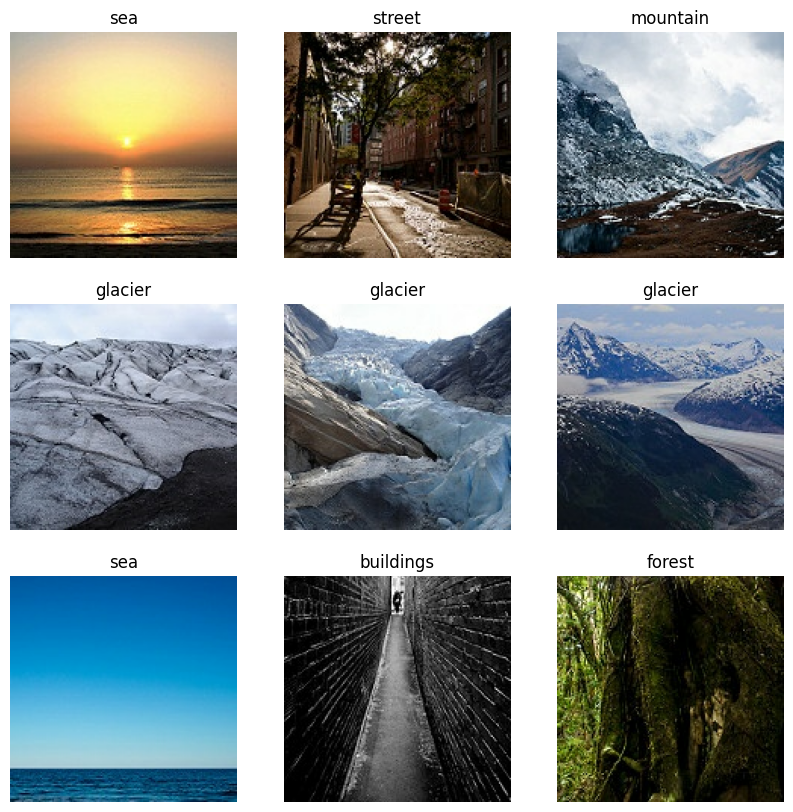

In [ ]:
import matplotlib.pyplot as plt

class_names = train_dataset.class_names

plt.figure(figsize=(10, 10))
for images, labels in train_dataset.take(1):
    for i in range(9):
        plt.subplot(3, 3, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))
        plt.title(class_names[labels[i]])
        plt.axis("off")
plt.show()

5. Normalización de las imágenes:
* Las imágenes que tenemos en image_dataset_from_directory están en rango [0, 255]. Para mejorar nuestro rendimiento del modelo, las normalizaremos dividiendo por 255 para que queden en el rango [0, 1]



In [ ]:
# Normalizar imágenes (conversión a valores entre 0 y 1)
normalization_layer = tf.keras.layers.Rescaling(1./255)

# Aplicar la normalización a los datasets
train_dataset = train_dataset.map(lambda x, y: (normalization_layer(x), y))
val_dataset = val_dataset.map(lambda x, y: (normalization_layer(x), y))

# Optimizar la carga de datos
AUTOTUNE = tf.data.AUTOTUNE
train_dataset = train_dataset.prefetch(buffer_size=AUTOTUNE)
val_dataset = val_dataset.prefetch(buffer_size=AUTOTUNE)

Verificamos funcionamiento normalización

In [ ]:
for image_batch, labels_batch in train_dataset.take(1):
    print("Valores de los píxeles antes y después de la normalización:")
    print(image_batch[0].numpy().min(), image_batch[0].numpy().max())  # Valores entre 0 y 1
    break

Valores de los píxeles antes y después de la normalización:
0.0 1.0


6. Construcción del modelo
* Creamos un modelo CNN simple que tiene 1 capa convolucional, 1 capa pooling y 1 capa densa con softmax para clasificación multiclase

In [ ]:
from tensorflow import keras
from tensorflow.keras import layers

# Definimos la arquitectura del modelo base
model_base = keras.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(150, 150, 3)),  # Capa convolucional
    layers.MaxPooling2D(2, 2),  # Capa de pooling
    layers.Flatten(),  # Aplanamos para la capa densa
    layers.Dense(128, activation='relu'),  # Capa completamente conectada
    layers.Dense(6, activation='softmax')  # Capa de salida con 6 clases
])

# Compilamos el modelo
model_base.compile(optimizer='adam',
                   loss='sparse_categorical_crossentropy',
                   metrics=['accuracy'])

# Resumen del modelo
model_base.summary()

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 148, 148, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 74, 74, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 175232)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 128)                 │      22,429,824 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 6)                   │             774 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 22,431,494 (85.57 MB)

 Trainable params: 22,431,494 (85.57 MB)

 Non-trainable params: 0 (0.00 B)

7. Entrenamiento del Modelo Base

In [ ]:
# Definir hiperparámetros
EPOCHS = 10
BATCH_SIZE = 32
# Reducimos el tamaño del dataset de entrenamiento a 3000 imágenes ya que a nivel de ejecución si usamos todos se nos colapsaba el ordenador
train_dataset_reduced = train_dataset.take(3000 // BATCH_SIZE)

# Entrenar el modelo
history_base = model_base.fit(
    train_dataset_reduced,
    validation_data=val_dataset,
    epochs=EPOCHS,
    batch_size=BATCH_SIZE
)

Epoch 1/10
93/93 ━━━━━━━━━━━━━━━━━━━━ 107s 1s/step - accuracy: 0.3927 - loss: 5.0674 - val_accuracy: 0.6162 - val_loss: 0.9821
Epoch 2/10
93/93 ━━━━━━━━━━━━━━━━━━━━ 140s 1s/step - accuracy: 0.7350 - loss: 0.7329 - val_accuracy: 0.6675 - val_loss: 0.8839
Epoch 3/10
93/93 ━━━━━━━━━━━━━━━━━━━━ 102s 1s/step - accuracy: 0.8813 - loss: 0.3997 - val_accuracy: 0.6878 - val_loss: 0.9136
Epoch 4/10
93/93 ━━━━━━━━━━━━━━━━━━━━ 101s 1s/step - accuracy: 0.9583 - loss: 0.1950 - val_accuracy: 0.7046 - val_loss: 0.9068
Epoch 5/10
93/93 ━━━━━━━━━━━━━━━━━━━━ 114s 1s/step - accuracy: 0.9728 - loss: 0.1246 - val_accuracy: 0.6878 - val_loss: 1.0924
Epoch 6/10
93/93 ━━━━━━━━━━━━━━━━━━━━ 104s 1s/step - accuracy: 0.9874 - loss: 0.0843 - val_accuracy: 0.6878 - val_loss: 1.1136
Epoch 7/10
93/93 ━━━━━━━━━━━━━━━━━━━━ 103s 1s/step - accuracy: 0.9909 - loss: 0.0423 - val_accuracy: 0.6892 - val_loss: 1.2306
Epoch 8/10
93/93 ━━━━━━━━━━━━━━━━━━━━ 107s 1s/step - accuracy: 0.9959 - loss: 0.0260 - val_accuracy: 0.6768 - v

8. Evaluación modelo base:
* Para medir el rendimiento

In [ ]:
# Evaluación en validación
val_loss, val_acc = model_base.evaluate(val_dataset)
print(f"Precisión en validación: {val_acc:.4f}")

88/88 ━━━━━━━━━━━━━━━━━━━━ 20s 227ms/step - accuracy: 0.7109 - loss: 1.1439
Precisión en validación: 0.7081


9. Construcción del Modelo Avanzado:
* Con más capas convolucionales para detectar patrones complejos, más capas de MaxPooling2D para reducir la dimensionalidad y una capa Dropout para prevenir el sobreajuste.

In [ ]:
# Definimos la arquitectura del modelo avanzado
model_advanced = keras.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(150, 150, 3)),
    layers.MaxPooling2D(2, 2),

    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D(2, 2),

    layers.Conv2D(128, (3, 3), activation='relu'),
    layers.MaxPooling2D(2, 2),

    layers.Flatten(),
    layers.Dense(512, activation='relu'),
    layers.Dropout(0.5),  # Regularización para evitar sobreajuste
    layers.Dense(6, activation='softmax')
])

# Compilamos el modelo
model_advanced.compile(optimizer='adam',
                        loss='sparse_categorical_crossentropy',
                        metrics=['accuracy'])

# Resumen del modelo
model_advanced.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_1 (Conv2D)                    │ (None, 148, 148, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 74, 74, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 72, 72, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 36, 36, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (None, 34, 34, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (None, 17, 17, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_1 (Flatten)                  │ (None, 36992)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 512)                 │      18,940,416 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 512)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 6)                   │           3,078 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 19,036,742 (72.62 MB)

 Trainable params: 19,036,742 (72.62 MB)

 Non-trainable params: 0 (0.00 B)

10. Entrenamos el Modelo Avanzado

In [ ]:
# Definir hiperparámetros
EPOCHS = 10  # Podriamos aumentar las epocas porque la arquitectura es más compleja, pero para reducir tiempo de ejecución mantenemos las mismas
# Reducimos el tamaño del dataset de entrenamiento a 3000 imágenes ya que a nivel de ejecución si usamos todos se nos colapsaba el ordenador
train_dataset_reduced = train_dataset.take(3000 // BATCH_SIZE)

# Entrenar el modelo avanzado
history_advanced = model_advanced.fit(
    train_dataset_reduced,
    validation_data=val_dataset,
    epochs=EPOCHS,
    batch_size=BATCH_SIZE
)

Epoch 1/10
93/93 ━━━━━━━━━━━━━━━━━━━━ 212s 2s/step - accuracy: 0.4354 - loss: 1.5250 - val_accuracy: 0.6101 - val_loss: 0.9618
Epoch 2/10
93/93 ━━━━━━━━━━━━━━━━━━━━ 207s 2s/step - accuracy: 0.6339 - loss: 0.9309 - val_accuracy: 0.6711 - val_loss: 0.8565
Epoch 3/10
93/93 ━━━━━━━━━━━━━━━━━━━━ 215s 2s/step - accuracy: 0.6807 - loss: 0.8076 - val_accuracy: 0.6532 - val_loss: 0.8910
Epoch 4/10
93/93 ━━━━━━━━━━━━━━━━━━━━ 209s 2s/step - accuracy: 0.7379 - loss: 0.7042 - val_accuracy: 0.7327 - val_loss: 0.7083
Epoch 5/10
93/93 ━━━━━━━━━━━━━━━━━━━━ 208s 2s/step - accuracy: 0.8099 - loss: 0.5421 - val_accuracy: 0.7512 - val_loss: 0.7086
Epoch 6/10
93/93 ━━━━━━━━━━━━━━━━━━━━ 261s 2s/step - accuracy: 0.8314 - loss: 0.4614 - val_accuracy: 0.7295 - val_loss: 0.7922
Epoch 7/10
93/93 ━━━━━━━━━━━━━━━━━━━━ 246s 3s/step - accuracy: 0.8645 - loss: 0.3723 - val_accuracy: 0.7423 - val_loss: 0.7784
Epoch 8/10
93/93 ━━━━━━━━━━━━━━━━━━━━ 207s 2s/step - accuracy: 0.8954 - loss: 0.2791 - val_accuracy: 0.7655 - v

11. Evaluamos el Modelo Avanzado

In [ ]:
# Evaluación en validación
val_loss, val_acc = model_advanced.evaluate(val_dataset)
print(f"Precisión en validación del modelo avanzado: {val_acc:.4f}")

88/88 ━━━━━━━━━━━━━━━━━━━━ 41s 464ms/step - accuracy: 0.7200 - loss: 1.0562
Precisión en validación del modelo avanzado: 0.7249


12. Optimizamos la arquitectura del Modelo Avanzado ajustando los valores de hiperparametros a traves de keras Tuner, con parámetros como nº de filtros en las capas Conv2D, tamaño de capas densas, funciones de activación, y por último uso de dropout y tasa de uso. Esta optimización la llevará a cabo keras tuner hasta obtener la mejor
* Al no tenerlo instalado primero lo instalamos en el Colab

In [ ]:
!pip install keras-tuner

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 129.1/129.1 kB 3.2 MB/s eta 0:00:00


In [ ]:
# Importamos
import keras_tuner as kt

13. Definimos la función de construcción del modelo

In [ ]:
def build_model(hp):
    model = keras.Sequential()

    # Establecemos primera capa convolucional (Nº de filtros variable)
    model.add(layers.Conv2D(
        filters=hp.Int('conv1_filters', min_value=32, max_value=128, step=32),
        kernel_size=(3, 3),
        activation='relu',
        input_shape=(150, 150, 3)
    ))
    model.add(layers.MaxPooling2D(2, 2))

    # Segunda capa convolucional (Opcional según búsqueda de hiperparámetros)
    if hp.Boolean('conv2'):
        model.add(layers.Conv2D(
            filters=hp.Int('conv2_filters', min_value=32, max_value=128, step=32),
            kernel_size=(3, 3),
            activation='relu'
        ))
        model.add(layers.MaxPooling2D(2, 2))

    model.add(layers.Flatten())

    # Capa densa con nº neuronas variable
    model.add(layers.Dense(
        units=hp.Int('dense_units', min_value=128, max_value=512, step=128),
        activation='relu'
    ))

    # Dropout opcional
    if hp.Boolean('dropout'):
        model.add(layers.Dropout(rate=0.5))

    # Capa de salida
    model.add(layers.Dense(6, activation='softmax'))

    # Compilamos el modelo con el optimizador variable
    model.compile(
        optimizer=hp.Choice('optimizer', values=['adam', 'rmsprop']),
        loss='sparse_categorical_crossentropy',
        metrics=['accuracy']
    )

    return model

Tras ejecutar este constructor establecemos lo siguiente:
* conv1_filters: Nº de filtros en la primera capa (32, 64, 96, 128)
* conv2: Booleano para agregar o no una segunda capa convolucional, según veamos.
* conv2_filters: Nº de filtros en la segunda capa (32, 64, 96, 128)
* dense_units: Tamaño de capa densa (128, 256, 384, 512)
* dropout: Booleano para aplicar o no Dropout(0.5)
* optimizer: Probamos entre Adam y RMSprop

14. Configuramos el algoritmo de búsqueda para optimizar el modelo

* Código original que sustituimos por el segundo ya que la ejecución de cada trial se alargaba demasiado y no llegaba a ejecutarse completo

In [ ]:
# Definimos el tuner (buscador de hiperparámetros)
# tuner = kt.Hyperband(
#    build_model,
#    objective='val_accuracy',  # Queremos maximizar la precisión en validación
#    max_epochs=10,
#    factor=3,
#    directory='keras_tuner_results',
#    project_name='image_classification_tuning'
#)

# Busca los mejores hiperparámetros
# tuner.search(train_dataset, validation_data=val_dataset, epochs=10)

* Reducimos el número de pruebas con max_trials, reducimos el dataset con tan solo 1000 imágenes en vez de todas y reducimos también el nº de épocas a 5

In [ ]:
import keras_tuner as kt

# Reducir el dataset de entrenamiento para acelerar el tuning
small_train_dataset = train_dataset.take(1000 // BATCH_SIZE)  # Usamos solo 1000 imágenes

# Definir el tuner (buscador de hiperparámetros) con RandomSearch para reducir tiempo
tuner = kt.RandomSearch(
    build_model,
    objective='val_accuracy',  # Queremos maximizar la precisión en validación
    max_trials=5,  # Limitar el número de pruebas a 5 configuraciones
    executions_per_trial=1,  # Ejecutar cada prueba solo una vez
    directory='keras_tuner_results',
    project_name='image_classification_tuning'
)

# Iniciar la búsqueda de hiperparámetros con dataset reducido y menos épocas
tuner.search(
    small_train_dataset,  # Dataset más pequeño para pruebas rápidas
    validation_data=val_dataset,
    epochs=5,  # Reducimos el número de épocas
    batch_size=BATCH_SIZE
)

Trial 5 Complete [00h 15m 13s]
val_accuracy: 0.6639344096183777

Best val_accuracy So Far: 0.6639344096183777
Total elapsed time: 00h 48m 29s


15. Obtenemos mejores hiperparametros y entrenamos el modelo final:
* Tras completar la búsqueda imprimimos los mejores valores

In [ ]:
# Obtenemos los mejores hiperparámetros encontrados
best_hps = tuner.get_best_hyperparameters(num_trials=1)[0]

print(f"""
Mejores hiperparámetros encontrados:
Conv1 filtros: {best_hps.get('conv1_filters')}
Usa Conv2: {best_hps.get('conv2')}
Conv2 filtros: {best_hps.get('conv2_filters') if best_hps.get('conv2') else 'No aplicado'}
Dense unidades: {best_hps.get('dense_units')}
Dropout: {best_hps.get('dropout')}
Optimizador: {best_hps.get('optimizer')}
""")


Mejores hiperparámetros encontrados:
Conv1 filtros: 64
Usa Conv2: False
Conv2 filtros: No aplicado
Dense unidades: 384
Dropout: False
Optimizador: rmsprop



Tras obtener los mejores hiperparámetros reentrenamos el modelo optimizado

In [ ]:
# Obtenemos el mejor modelo basado en los hiperparámetros encontrados
best_model = tuner.get_best_models(num_models=1)[0]
# Reducimos el dataset para acelerar el entrenamiento ya que al reentrenar de nuevo se elevaba enormemente el tiempo de ejecución aun con los datos optimizados
small_train_dataset = train_dataset.take(1000 // BATCH_SIZE)

# Entrenamos el mejor modelo en los datos completos
history_hpt = best_model.fit(
    small_train_dataset,
    validation_data=val_dataset,
    epochs=10,  # Ajusta según recursos disponibles
    batch_size=BATCH_SIZE
)

Epoch 1/10


/usr/local/lib/python3.11/dist-packages/keras/src/saving/saving_lib.py:757: UserWarning: Skipping variable loading for optimizer 'rmsprop', because it has 2 variables whereas the saved optimizer has 8 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


31/31 ━━━━━━━━━━━━━━━━━━━━ 203s 7s/step - accuracy: 0.7399 - loss: 1.3103 - val_accuracy: 0.5050 - val_loss: 1.4687
Epoch 2/10
31/31 ━━━━━━━━━━━━━━━━━━━━ 150s 5s/step - accuracy: 0.9278 - loss: 0.2530 - val_accuracy: 0.4562 - val_loss: 2.0744
Epoch 3/10
31/31 ━━━━━━━━━━━━━━━━━━━━ 159s 5s/step - accuracy: 0.9313 - loss: 0.2506 - val_accuracy: 0.6251 - val_loss: 1.1613
Epoch 4/10
31/31 ━━━━━━━━━━━━━━━━━━━━ 188s 6s/step - accuracy: 0.9640 - loss: 0.1785 - val_accuracy: 0.6254 - val_loss: 1.2158
Epoch 5/10
31/31 ━━━━━━━━━━━━━━━━━━━━ 153s 5s/step - accuracy: 0.9859 - loss: 0.0778 - val_accuracy: 0.3218 - val_loss: 3.8404
Epoch 6/10
31/31 ━━━━━━━━━━━━━━━━━━━━ 151s 5s/step - accuracy: 0.9268 - loss: 0.2795 - val_accuracy: 0.6294 - val_loss: 1.1223
Epoch 7/10
31/31 ━━━━━━━━━━━━━━━━━━━━ 160s 5s/step - accuracy: 0.9928 - loss: 0.0504 - val_accuracy: 0.6522 - val_loss: 1.1725
Epoch 8/10
31/31 ━━━━━━━━━━━━━━━━━━━━ 186s 6s/step - accuracy: 0.9935 - loss: 0.0522 - val_accuracy: 0.3357 - val_loss: 6.

16. Implementación de Transfer Learning:
* En nuestro caso, vamos a usar un modelo preentrenado de Keras, en concreto, MobileNetV2 de forma similar a las practicas llevadas en modulos anteriores. Vamos a llevar a cabo 2 pasos principales primero el Feature Extraction donde congelamos las capas del modelo preentrenado y tras esto el Fine-Tunning donde descongelaremos algunas capas para mejorar el rendimiento.
* Podriamos usar VGG16 o ResNet como en anteriores prácticas pero tras un análisis considere que este sería la implementación mas optimizada y sencilla.

In [ ]:
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras import layers, models

# Cargamos el modelo preentrenado sin la capa de salida
base_model = MobileNetV2(input_shape=(150, 150, 3), include_top=False, weights="imagenet")

# Primero congelamos las capas del modelo preentrenado que corresponde al Feature Extraction
base_model.trainable = False

# Definimos la nueva arquitectura
model_transfer = models.Sequential([
    base_model,  # Modelo preentrenado congelado
    layers.GlobalAveragePooling2D(),  # Para reducir asi la dimensionalidad
    layers.Dense(128, activation='relu'),
    layers.Dropout(0.5),  # Aplicamos regularización con dropout para evitar el sobreajuste
    layers.Dense(6, activation='softmax')  # Capa de salida con 6 clases
])

# Compilamos el modelo
model_transfer.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

# Resumen del modelo
model_transfer.summary()

<ipython-input-22-aea627876949>:5: UserWarning: `input_shape` is undefined or non-square, or `rows` is not in [96, 128, 160, 192, 224]. Weights for input shape (224, 224) will be loaded as the default.
  base_model = MobileNetV2(input_shape=(150, 150, 3), include_top=False, weights="imagenet")


9406464/9406464 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ mobilenetv2_1.00_224 (Functional)    │ (None, 5, 5, 1280)          │       2,257,984 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ global_average_pooling2d             │ (None, 1280)                │               0 │
│ (GlobalAveragePooling2D)             │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 128)                 │         163,968 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 6)                   │             774 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 2,422,726 (9.24 MB)

 Trainable params: 164,742 (643.52 KB)

 Non-trainable params: 2,257,984 (8.61 MB)

17. Entrenamos el modelo personalizado
* Gracias al Feature Extraction no hace falta reducir la muestra ya que se entrena más rápido, tras esto calculamos la accuracy y valoramos si es necesario o no Fine Tuning

In [ ]:
history_transfer = model_transfer.fit(
    train_dataset, # En este modelo no es necesario reducir el dataset ya que el Feature Extraction optimiza el entrenamiento
    validation_data=val_dataset,
    epochs=10,
    batch_size=BATCH_SIZE
)

Epoch 1/10
351/351 ━━━━━━━━━━━━━━━━━━━━ 313s 872ms/step - accuracy: 0.7642 - loss: 0.6520 - val_accuracy: 0.8956 - val_loss: 0.2831
Epoch 2/10
351/351 ━━━━━━━━━━━━━━━━━━━━ 295s 840ms/step - accuracy: 0.8789 - loss: 0.3342 - val_accuracy: 0.8927 - val_loss: 0.2697
Epoch 3/10
351/351 ━━━━━━━━━━━━━━━━━━━━ 300s 856ms/step - accuracy: 0.8983 - loss: 0.2873 - val_accuracy: 0.9027 - val_loss: 0.2676
Epoch 4/10
351/351 ━━━━━━━━━━━━━━━━━━━━ 294s 835ms/step - accuracy: 0.9053 - loss: 0.2656 - val_accuracy: 0.8981 - val_loss: 0.2632
Epoch 5/10
351/351 ━━━━━━━━━━━━━━━━━━━━ 295s 840ms/step - accuracy: 0.9124 - loss: 0.2489 - val_accuracy: 0.9002 - val_loss: 0.2727
Epoch 6/10
351/351 ━━━━━━━━━━━━━━━━━━━━ 318s 829ms/step - accuracy: 0.9154 - loss: 0.2312 - val_accuracy: 0.9024 - val_loss: 0.2839
Epoch 7/10
351/351 ━━━━━━━━━━━━━━━━━━━━ 266s 758ms/step - accuracy: 0.9177 - loss: 0.2151 - val_accuracy: 0.8991 - val_loss: 0.2716
Epoch 8/10
351/351 ━━━━━━━━━━━━━━━━━━━━ 350s 836ms/step - accuracy: 0.9163 -

18. Si modelo no alcanza la accuracy deseada, descongelamos capas y aplicamos Fine Tuning de la siguiente forma

In [ ]:
# Descongelamos las últimas 20 capas para aplicar Fine Tuning
base_model.trainable = True
for layer in base_model.layers[:-20]:  # Congelamos todas menos las últimas 20 capas
    layer.trainable = False

# Compilamos nuevamente el modelo
model_transfer.compile(
    optimizer=tf.keras.optimizers.Adam(1e-5),  # Establecemos tasa de aprendizaje baja para Fine-Tuning
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

# Entrenamos modelo con Fine Tuning
history_fine_tuning = model_transfer.fit(
    train_dataset,
    validation_data=val_dataset,
    epochs=5,  # Pocas épocas para no producir sobreajuste
    batch_size=BATCH_SIZE
)

Epoch 1/5
351/351 ━━━━━━━━━━━━━━━━━━━━ 383s 1s/step - accuracy: 0.8083 - loss: 0.5811 - val_accuracy: 0.9056 - val_loss: 0.3164
Epoch 2/5
351/351 ━━━━━━━━━━━━━━━━━━━━ 348s 951ms/step - accuracy: 0.8849 - loss: 0.3140 - val_accuracy: 0.9084 - val_loss: 0.2984
Epoch 3/5
351/351 ━━━━━━━━━━━━━━━━━━━━ 416s 1s/step - accuracy: 0.9003 - loss: 0.2705 - val_accuracy: 0.9073 - val_loss: 0.2934
Epoch 4/5
351/351 ━━━━━━━━━━━━━━━━━━━━ 368s 1s/step - accuracy: 0.9101 - loss: 0.2415 - val_accuracy: 0.9041 - val_loss: 0.2913
Epoch 5/5
351/351 ━━━━━━━━━━━━━━━━━━━━ 351s 959ms/step - accuracy: 0.9192 - loss: 0.2210 - val_accuracy: 0.9048 - val_loss: 0.2900


Al analizar los resultados obtengo: Fine Tuning no ha mejorado significativamente la accuracy en validación, lo cual podemos considerar como  normal ya que el modelo preentrenado ya estaba bien optimizado para nuestro conjunto de datos. Ahora podemos o quedarnos con los mejores pesos del modelo antes de aplicar el Fine Tuning o usar el modelo ajustado si queremos comparar su rendimiento en test

19. Aplicamos data augmentation para para mejorar la capacidad del modelo de generalizar en imágenes nuevas
* Primero debemos crear un generador de datos aumentados

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Definimos el generador de datos con aumentos
datagen = ImageDataGenerator(
    rotation_range=20,  # Rotaciones de hasta 20 grados
    width_shift_range=0.2,  # Desplazamiento horizontal del 20%
    height_shift_range=0.2,  # Desplazamiento vertical del 20%
    zoom_range=0.2,  # Zoom aleatorio de hasta el 20%
    horizontal_flip=True,  # Volteo horizontal aleatorio
    rescale=1./255,  # Normalizamos
    validation_split=0.2  # Separamos un 20% para validación
)

# Creamos generadores de entrenamiento y validación
train_generator = datagen.flow_from_directory(
    "/content/seg_train/seg_train",
    target_size=(150, 150),
    batch_size=BATCH_SIZE,
    class_mode='categorical',
    subset="training"  # Subconjunto de entrenamiento
)

val_generator = datagen.flow_from_directory(
    "/content/seg_train/seg_train",
    target_size=(150, 150),
    batch_size=BATCH_SIZE,
    class_mode='categorical',
    subset="validation"  # Subconjunto de validación
)

Found 11230 images belonging to 6 classes.
Found 2804 images belonging to 6 classes.


20. Entrenamos el modelo con el data augmentation

In [ ]:
# Definimos un nuevo modelo basado en la misma arquitectura de Transfer Learning
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras import layers, models

# Cargamos MobileNetV2 sin entrenar
base_model_aug = MobileNetV2(input_shape=(150, 150, 3), include_top=False, weights="imagenet")
base_model_aug.trainable = False  # Congelamos capas preentrenadas

# Definimos una nueva arquitectura para Data Augmentation
model_aug = models.Sequential([
    base_model_aug,
    layers.GlobalAveragePooling2D(),
    layers.Dense(128, activation='relu'),
    layers.Dropout(0.5),  # Regularización con drop out
    layers.Dense(6, activation='softmax')  # Clasificación en 6 clases
])

# Compilamos el modelo
model_aug.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

<ipython-input-26-2a09c5273f86>:6: UserWarning: `input_shape` is undefined or non-square, or `rows` is not in [96, 128, 160, 192, 224]. Weights for input shape (224, 224) will be loaded as the default.
  base_model_aug = MobileNetV2(input_shape=(150, 150, 3), include_top=False, weights="imagenet")


In [ ]:
# Entrenamos el nuevo modelo con datos aumentados
history_aug = model_aug.fit(
    train_generator,
    validation_data=val_generator,
    epochs=10
)

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/10
351/351 ━━━━━━━━━━━━━━━━━━━━ 350s 980ms/step - accuracy: 0.6710 - loss: 0.9046 - val_accuracy: 0.8502 - val_loss: 0.3997
Epoch 2/10
351/351 ━━━━━━━━━━━━━━━━━━━━ 341s 972ms/step - accuracy: 0.8212 - loss: 0.4887 - val_accuracy: 0.8559 - val_loss: 0.3819
Epoch 3/10
351/351 ━━━━━━━━━━━━━━━━━━━━ 348s 992ms/step - accuracy: 0.8344 - loss: 0.4504 - val_accuracy: 0.8655 - val_loss: 0.3698
Epoch 4/10
351/351 ━━━━━━━━━━━━━━━━━━━━ 343s 977ms/step - accuracy: 0.8413 - loss: 0.4323 - val_accuracy: 0.8759 - val_loss: 0.3549
Epoch 5/10
351/351 ━━━━━━━━━━━━━━━━━━━━ 383s 981ms/step - accuracy: 0.8493 - loss: 0.4195 - val_accuracy: 0.8609 - val_loss: 0.3759
Epoch 6/10
351/351 ━━━━━━━━━━━━━━━━━━━━ 342s 975ms/step - accuracy: 0.8515 - loss: 0.4099 - val_accuracy: 0.8709 - val_loss: 0.3452
Epoch 7/10
351/351 ━━━━━━━━━━━━━━━━━━━━ 382s 975ms/step - accuracy: 0.8551 - loss: 0.4002 - val_accuracy: 0.8666 - val_loss: 0.3619
Epoch 8/10
351/351 ━━━━━━━━━━━━━━━━━━━━ 346s 985ms/step - accuracy: 0.8527 -

21. Cargamos las imágenes de test para evaluar el modelo



In [ ]:
# Creamos generador de datos test (sin aumento de datos)
test_datagen = ImageDataGenerator(rescale=1./255)

# Tengo que generar 2 generadores distintos ya que cada modelo tiene sus propiedades y me daba conflicto si en uno aplicada
# sparse y en el otro categorical

# Generador para modelos con sparse_categorical_crossentropy
test_generator_sparse = test_datagen.flow_from_directory(
    "/content/seg_test/seg_test",
    target_size=(150, 150),
    batch_size=BATCH_SIZE,
    class_mode='sparse',  # Para modelos con sparse_categorical_crossentropy
    shuffle=False
)

# Generador para modelos con categorical_crossentropy
test_generator_categorical = test_datagen.flow_from_directory(
    "/content/seg_test/seg_test",
    target_size=(150, 150),
    batch_size=BATCH_SIZE,
    class_mode='categorical',  # Para modelos con categorical_crossentropy
    shuffle=False
)

Found 3000 images belonging to 6 classes.
Found 3000 images belonging to 6 classes.


22. Evaluamos los modelos en Test

In [ ]:
# Evaluación de cada modelo
models = {
    "Modelo base CNN": model_base,
    "Modelo Avanzado CNN": model_advanced,
    "Hyperparameter Tuned CNN": tuner.get_best_models(num_models=1)[0],
    "Transfer Learning": model_transfer,
    "Data Augmentation": model_aug
}

# Evaluamos cada modelo en test
test_results = {}

for model_name, model in models.items():
    # If que determina el generador correcto según la función de pérdida del modelo
    if model.loss == "sparse_categorical_crossentropy":
        loss, acc = model.evaluate(test_generator_sparse, verbose=1)
    else:
        loss, acc = model.evaluate(test_generator_categorical, verbose=1)

    test_results[model_name] = acc
    print(f"{model_name}: Test Accuracy = {acc:.4f}")

94/94 ━━━━━━━━━━━━━━━━━━━━ 28s 291ms/step - accuracy: 0.6748 - loss: 1.4397
Modelo base CNN: Test Accuracy = 0.6853
94/94 ━━━━━━━━━━━━━━━━━━━━ 47s 493ms/step - accuracy: 0.7920 - loss: 0.7679
Modelo Avanzado CNN: Test Accuracy = 0.7247
94/94 ━━━━━━━━━━━━━━━━━━━━ 53s 552ms/step - accuracy: 0.6525 - loss: 0.9542
Hyperparameter Tuned CNN: Test Accuracy = 0.6433
94/94 ━━━━━━━━━━━━━━━━━━━━ 59s 600ms/step - accuracy: 0.9126 - loss: 0.2414
Transfer Learning: Test Accuracy = 0.9043
94/94 ━━━━━━━━━━━━━━━━━━━━ 58s 606ms/step - accuracy: 0.9166 - loss: 0.2165
Data Augmentation: Test Accuracy = 0.8927


24. Creamos gráfica comparativa

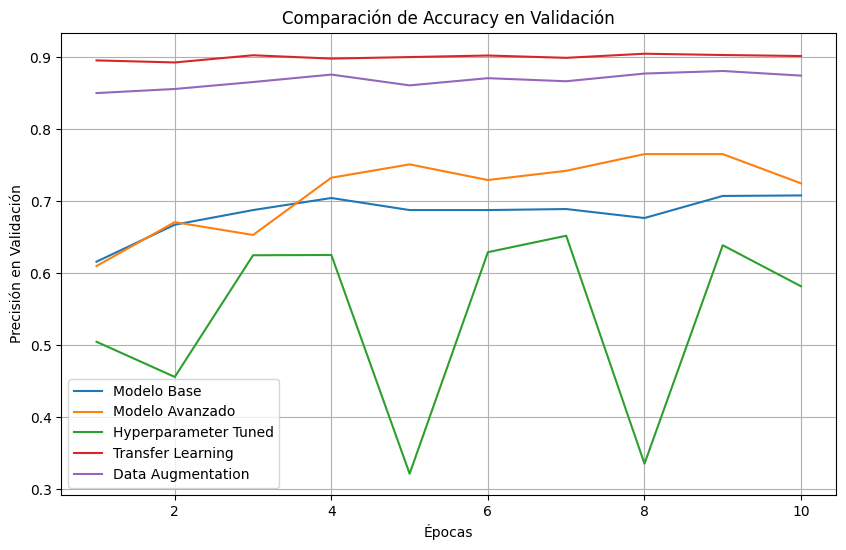

In [ ]:
import matplotlib.pyplot as plt

# Generamos un diccionario con los historiales de accuracy
histories = {
    "Modelo Base": history_base.history['val_accuracy'],
    "Modelo Avanzado": history_advanced.history['val_accuracy'],
    "Hyperparameter Tuned": history_hpt.history['val_accuracy'],
    "Transfer Learning": history_transfer.history['val_accuracy'],
    "Data Augmentation": history_aug.history['val_accuracy']
}

# Tras tener todos los modelos realizamos la gráfica comparativa
plt.figure(figsize=(10, 6))
for model, val_acc in histories.items():
    plt.plot(range(1, len(val_acc) + 1), val_acc, label=model)

plt.xlabel('Épocas')
plt.ylabel('Precisión en Validación')
plt.title('Comparación de Accuracy en Validación')
plt.legend()
plt.grid(True)
plt.show()

25. Tabla Comparativa

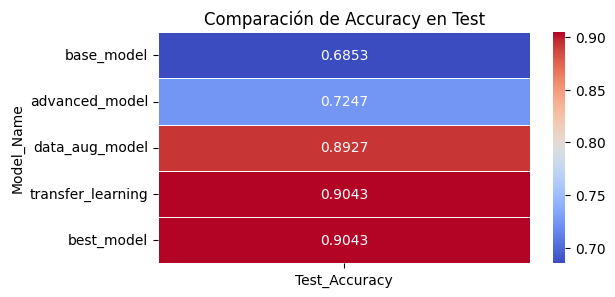

          Model_Name  Test_Accuracy
0         base_model       0.685333
1     advanced_model       0.724667
2     data_aug_model       0.892667
3  transfer_learning       0.904333
4         best_model       0.904333


In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Diccionario de modelos
models = {
    "base_model": model_base,
    "advanced_model": model_advanced,
    "data_aug_model": model_aug,
    "transfer_learning": model_transfer,
    "best_model": best_model
}

# Definimos funcion para seleccionar el generador correcto según la pérdida del modelo
def get_test_generator(model):
    loss = model.loss if isinstance(model.loss, str) else model.loss.__name__
    return test_generator_sparse if "sparse" in loss else test_generator_categorical

# Evaluamos modelos
results = {}
for name, model in models.items():
    test_gen = get_test_generator(model)
    _, accuracy = model.evaluate(test_gen, verbose=0)
    results[name] = accuracy

# Creamos el DataFrame con los resultados
df_results = pd.DataFrame(results.items(), columns=["Model_Name", "Test_Accuracy"])

# Creamos el heatmap
plt.figure(figsize=(6, 3))
sns.heatmap(df_results.set_index("Model_Name"), annot=True, fmt=".4f", cmap="coolwarm", linewidths=0.5)
plt.title("Comparación de Accuracy en Test")
plt.show()

# Por último mostramos la tabla en texto
print(df_results)

# Conclusión de la Práctica
En esta práctica hemos abordado el problema de clasificación de imágenes utilizando diversas arquitecturas de redes neuronales convolucionales (CNN). He implementado y comparado 5 modelos con diferentes enfoques:

* Modelo base CNN: Un modelo simple con una capa convolucional y pooling.
* Modelo avanzado CNN: Creamos una expansión del modelo base con más capas convolucionales y uso de dropout para mejorar la generalización y evitar sobreajuste.
* Modelo optimizado con Keras Tuner: Aplicando búsqueda de hiperparámetros para ajustar la arquitectura de la red y mejorar su rendimiento.
* Modelo basado en Transfer Learning: Utilizando MobileNetV2 preentrenado con la técnica de Feature Extraction y Fine Tuning, obteniendo los mejores resultados.
* Modelo con Data Augmentation: Aplicando un ImageDataGenerator para aumentar artificialmente el dataset y asi conseguimos mejorar la capacidad de generalización del modelo.

Tras todo el entrenamiento y la evaluación de los modelos en el conjunto de test, hemos generado una gráfica comparativa de val_accuracy y una tabla con los resultados finales en test, gracias a las cuales podemos permitirnos identificar qué modelos han obtenido un mejor desempeño y cuales menos.